### _Boston House Price Prediciton_
#### _Linear regression using Gradient Descent_

In [1]:

#! pip install kaggle


In [2]:
#! kaggle --version

In [3]:
#! kaggle datasets download arunjathari/bostonhousepricedata

In [4]:
! ls -la

total 536
drwxrwxrwx 1 aswinpushkar11 aswinpushkar11   4096 Dec 27 23:21 .
drwxrwxrwx 1 aswinpushkar11 aswinpushkar11   4096 Dec 27 16:17 ..
drwxrwxrwx 1 aswinpushkar11 aswinpushkar11   4096 Dec 27 23:39 .git
-rwxrwxrwx 1 aswinpushkar11 aswinpushkar11  41359 Dec 27 19:08 Boston-house-price-data.csv
-rwxrwxrwx 1 aswinpushkar11 aswinpushkar11  12616 Sep 22  2020 bostonhousepricedata.zip
-rwxrwxrwx 1 aswinpushkar11 aswinpushkar11 454831 Dec 27 23:38 bpp.ipynb
-rwxrwxrwx 1 aswinpushkar11 aswinpushkar11  27765 Dec 27 23:21 output.png


In [5]:
#! pip install Scikit-learn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
%matplotlib inline


In [7]:
#Unzipping the dataset 
import zipfile

zip_path='/mnt/c/Personal/VS Code/Python/BostonHousePricePrediciton/bostonhousepricedata.zip'
tgt_path='/mnt/c/Personal/VS Code/Python/BostonHousePricePrediciton/'
with zipfile.ZipFile(zip_path,'r') as zip_ref:
    zip_ref.extractall(tgt_path)

In [8]:
df=pd.read_csv('/mnt/c/Personal/VS Code/Python/BostonHousePricePrediciton/Boston-house-price-data.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### _Abbreviaitons of columns_ ###


- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's


In [11]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
input_data = df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
input_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [13]:
target_data = df[['MEDV']]
target_data

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


Text(0, 0.5, 'Age')

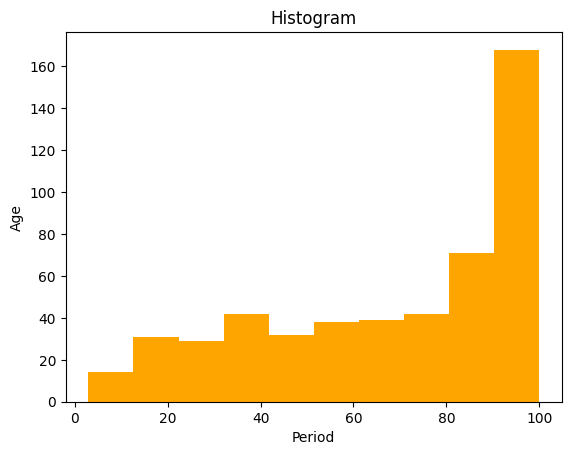

In [14]:
plt.hist(df['AGE'],color='Orange')
plt.title('Histogram')
plt.xlabel('Period')
plt.ylabel('Age')

In [15]:
# To find the number of unique values

df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [16]:
df['RAD'].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

In [17]:
#CHAS can be converted to a categorical column
df['CHAS'].unique()

array([0, 1])

In [18]:
df['CHAS']=pd.Categorical(df['CHAS'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    int64   
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(1), float64(12), int64(1)
memory usage: 52.1 KB


In [20]:
def Overview(dataframe):
    print('Shape of the DataFrame:',dataframe.shape)
    print('Number of columns in the dataframe:',dataframe.shape[0])
    print('Number of columns in the dataframe:',dataframe.shape[1])
    print('Categorical Columns:',dataframe.select_dtypes(include = ['category']).columns)
    print('Numerical Columns:',dataframe.select_dtypes(include = ['float64']).columns)


Overview(df)

Shape of the DataFrame: (506, 14)
Number of columns in the dataframe: 506
Number of columns in the dataframe: 14
Categorical Columns: Index(['CHAS'], dtype='object')
Numerical Columns: Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'MEDV'],
      dtype='object')


In [21]:
#correlation_matrix
corr_matrix = df.corr().round(2)
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.00
RM         0.70
ZN         0.36
B          0.33
DIS        0.25
CHAS       0.18
AGE       -0.38
RAD       -0.38
CRIM      -0.39
NOX       -0.43
TAX       -0.47
INDUS     -0.48
PTRATIO   -0.51
LSTAT     -0.74
Name: MEDV, dtype: float64

<Axes: >

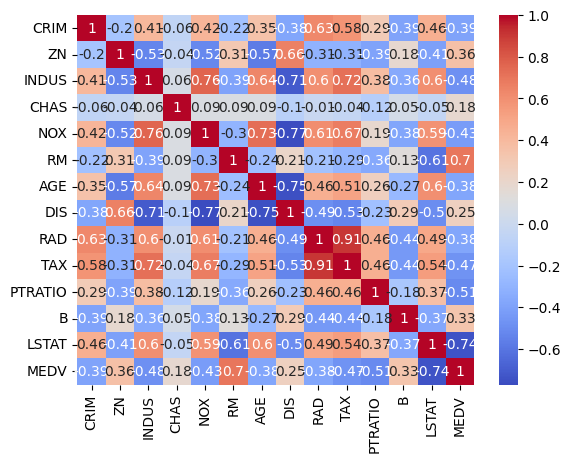

In [22]:
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

In [23]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

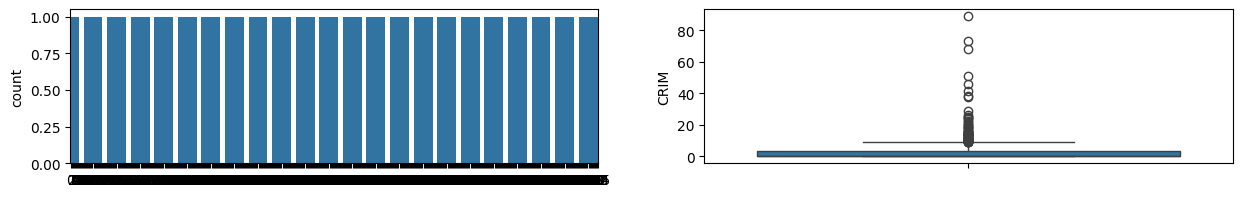

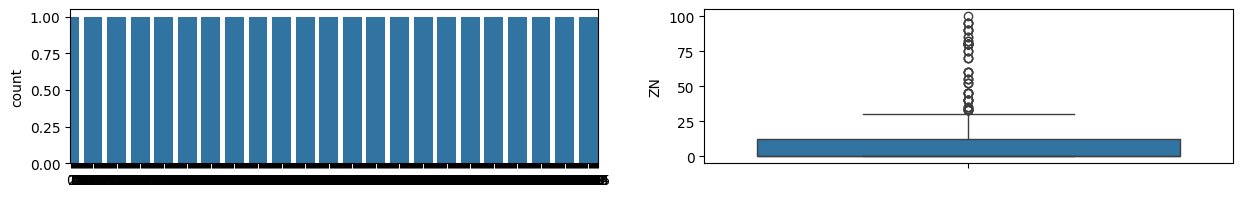

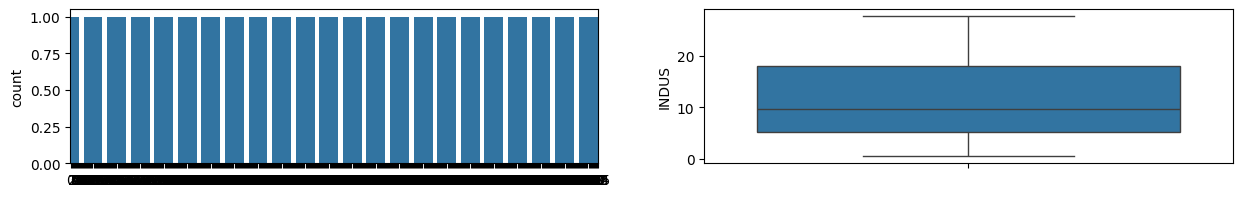

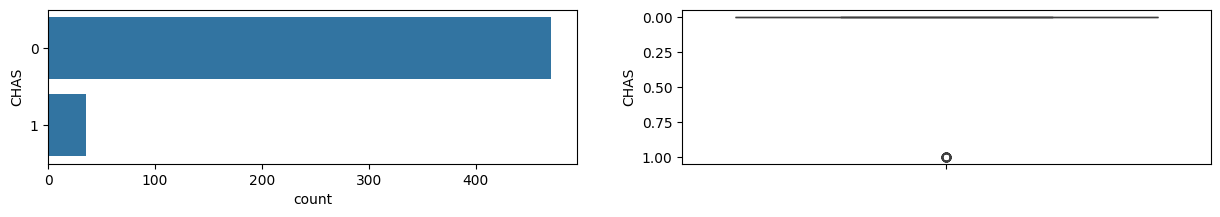

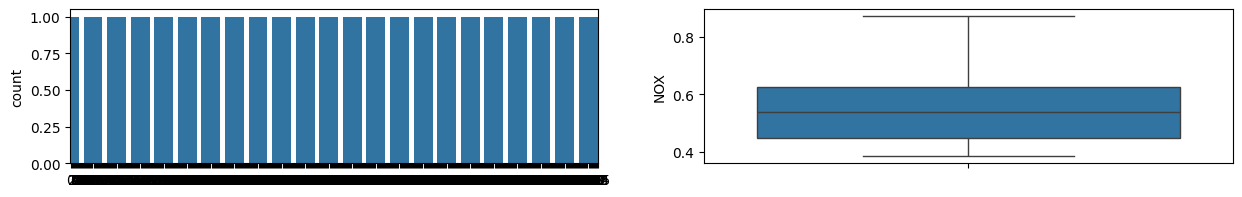

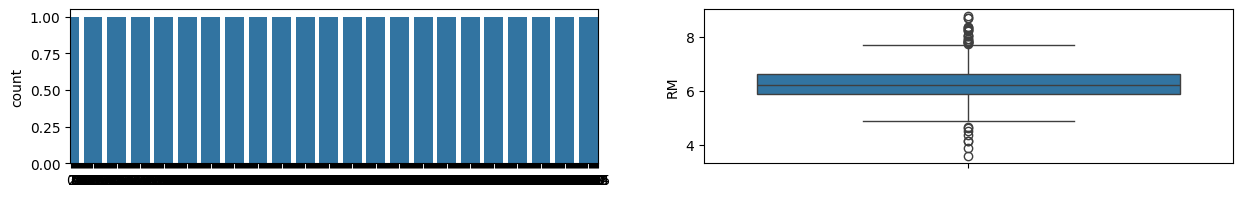

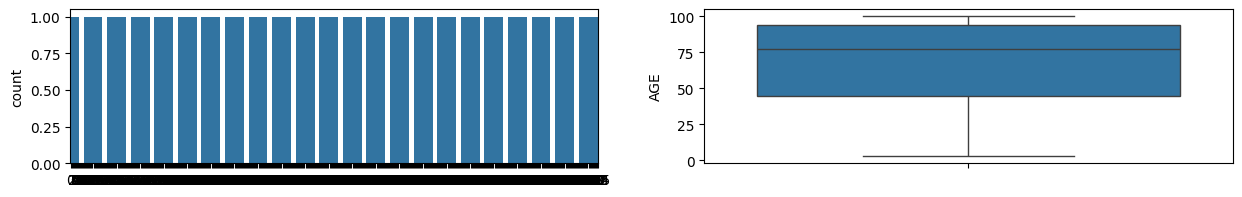

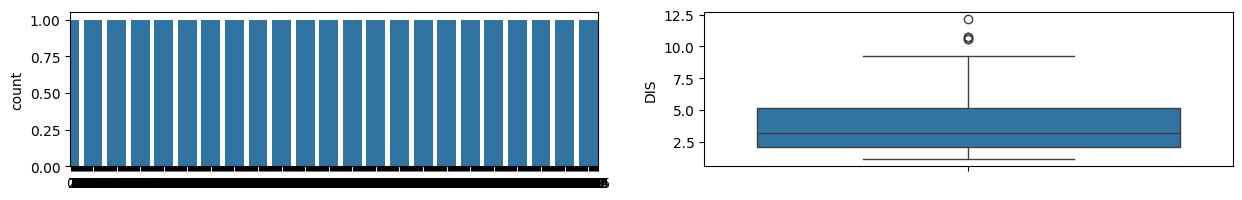

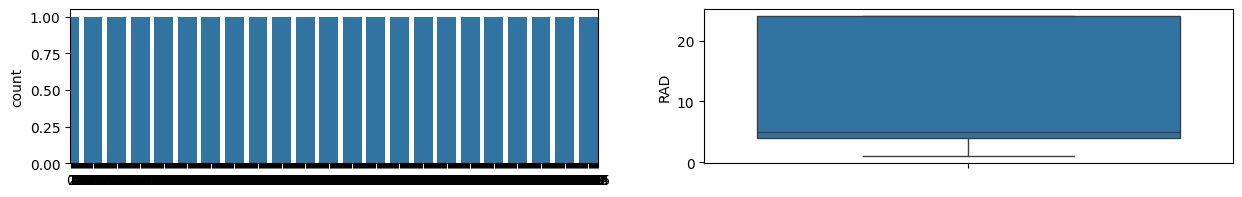

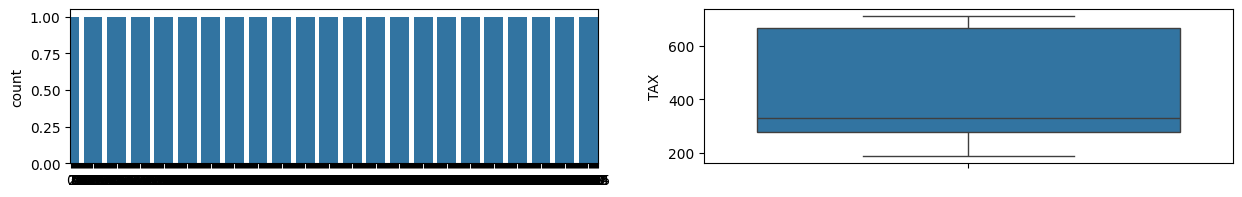

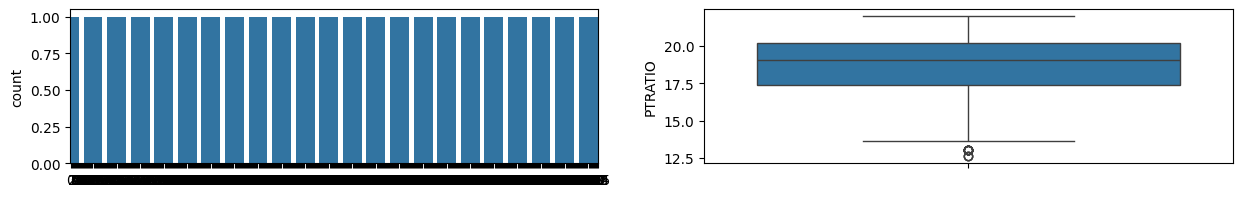

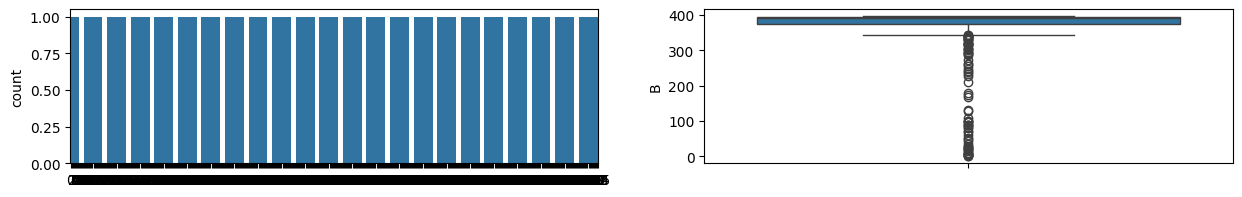

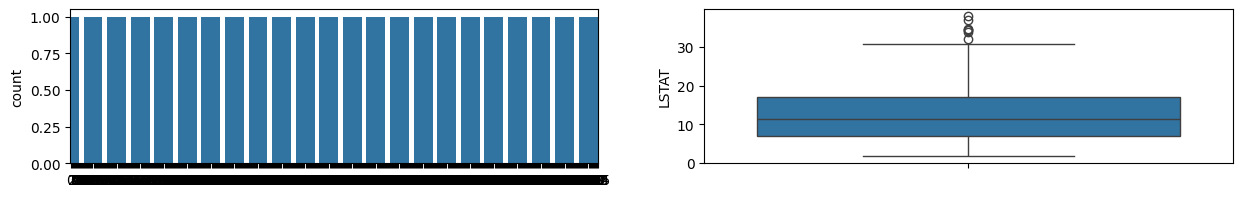

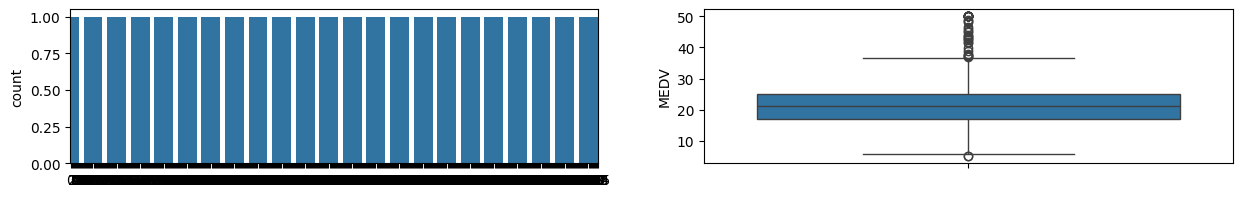

In [24]:
for col in df.columns:
    fig,ax=plt.subplots(1,2,figsize=(15,2))
    if (len(np.unique(df[col])< 10)):
        sns.countplot(df[col],ax=ax[0])
    else:
        sns.distplot(df[col],bins=50 if len(np.unique(df[col]))>50 else None,ax=ax[0])

    sns.boxplot(df[col],ax=ax[1])

In [96]:
#splitting training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_data,target_data,test_size=0.1,random_state=42)

In [97]:
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (455, 13)
x_test: (51, 13)
y_train: (455, 1)
y_test: (51, 1)


In [98]:
input_data.loc[0]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
Name: 0, dtype: float64

In [112]:
y_test.reset_index(inplace=True)

In [113]:
y_test.drop(columns='index',axis=1,inplace=True)

In [114]:
y_test

,MEDV
0,23.6
1,32.4
2,13.6
3,22.8
4,16.1
5,20.0
6,17.8
7,14.0
8,19.6
9,16.8


In [ ]:
ax_train = x_train.values
y_train = y_train.values
x_test = x_test.values
y_test = y_test.values


In [130]:
x_train

array([[3.70500e-02, 2.00000e+01, 3.33000e+00, ..., 1.49000e+01,
        3.92230e+02, 4.59000e+00],
       [1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [1.14320e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        3.95580e+02, 7.67000e+00],
       ...,
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [1.11604e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.09850e+02, 2.32700e+01],
       [2.28760e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        7.08000e+01, 1.06300e+01]])

In [133]:
y_test

array([[23.6],
       [32.4],
       [13.6],
       [22.8],
       [16.1],
       [20. ],
       [17.8],
       [14. ],
       [19.6],
       [16.8],
       [21.5],
       [18.9],
       [ 7. ],
       [21.2],
       [18.5],
       [29.8],
       [18.8],
       [10.2],
       [50. ],
       [14.1],
       [25.2],
       [29.1],
       [12.7],
       [22.4],
       [14.2],
       [13.8],
       [20.3],
       [14.9],
       [21.7],
       [18.3],
       [23.1],
       [23.8],
       [15. ],
       [20.8],
       [19.1],
       [19.4],
       [34.7],
       [19.5],
       [24.4],
       [23.4],
       [19.7],
       [28.2],
       [50. ],
       [17.4],
       [22.6],
       [15.1],
       [13.1],
       [24.2],
       [19.9],
       [24. ],
       [18.9]])

In [142]:
#compute_cost function
def compute_cost(x,y,w,b):
    m=x.shape[0]
    y_pred = np.dot(w,x)+b
    err = np.sum((y_pred-y_train)**2)
    cost=err/(2*m)
    return cost
    
